# 

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy after SMOTE: 0.9195
Precision: 0.9464
Recall: 0.9263
F1 Score: 0.9362

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       724
           1       0.95      0.93      0.94      1276

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000



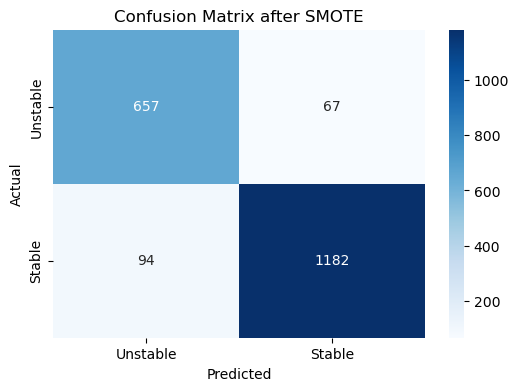

In [7]:
# SMOTE + AdaboostClassifier (RandomForest) : 91.95%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Load dataset
file_path = "C:/Users/user/Downloads/Data_for_UCI_named.csv"
df = pd.read_csv(file_path)
df = df.dropna()

# Define features and target
features = ["tau1", "tau2", "tau3", "tau4", "p1", "p2", "p3", "p4", "g1", "g2", "g3", "g4"]
target = "stabf"

# Convert target variable to numerical labels
if df[target].dtype == 'object':
    df[target] = df[target].astype('category').cat.codes  # Convert target to numeric

# Split dataset
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train AdaBoost with RandomForest as base estimator
ada_model = AdaBoostClassifier(estimator=RandomForestClassifier(),n_estimators=150, learning_rate=0.01, random_state=42)

ada_model.fit(X_train_resampled, y_train_resampled)  # Train with resampled data

# Predictions
y_pred = ada_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy after SMOTE: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unstable", "Stable"], yticklabels=["Unstable", "Stable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix after SMOTE")
plt.show()


Accuracy after SMOTE: 0.9300
Precision: 0.9515
Recall: 0.9381
F1 Score: 0.9448

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       724
           1       0.95      0.94      0.94      1276

    accuracy                           0.93      2000
   macro avg       0.92      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000



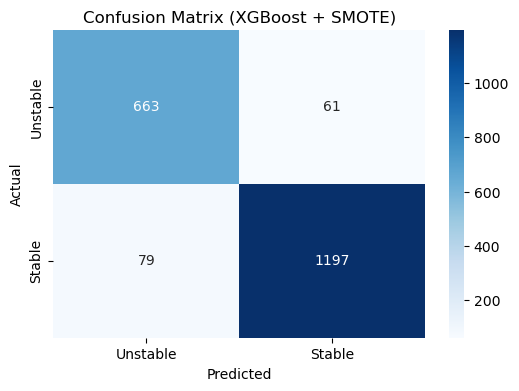

In [2]:
# SMOTE + XGBoost (n_esitimator = 100, learning_rate = 0.05) : 93%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier  # Import XGBoost

# Load dataset
file_path = "C:/Users/user/Downloads/Data_for_UCI_named.csv"
df = pd.read_csv(file_path)
df = df.dropna()

# Define features and target
features = ["tau1", "tau2", "tau3", "tau4", "p1", "p2", "p3", "p4", "g1", "g2", "g3", "g4"]
target = "stabf"

# Convert target variable to numerical labels
if df[target].dtype == 'object':
    df[target] = df[target].astype('category').cat.codes

# Split dataset
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy after SMOTE: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unstable", "Stable"], yticklabels=["Unstable", "Stable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost + SMOTE)")
plt.show()


[I 2025-04-07 09:44:09,489] A new study created in memory with name: no-name-2f3174e5-6870-472b-b0ef-9ef1a672fe34
[I 2025-04-07 09:44:09,789] Trial 0 finished with value: 0.933 and parameters: {'n_estimators': 45, 'max_depth': 5, 'learning_rate': 0.1790389288836281, 'subsample': 0.9030817668108069, 'colsample_bytree': 0.7935352427651872, 'gamma': 4.63266072696221, 'reg_alpha': 0.8522004286396934, 'reg_lambda': 3.577996012872183, 'min_child_weight': 4}. Best is trial 0 with value: 0.933.
[I 2025-04-07 09:44:10,661] Trial 1 finished with value: 0.888 and parameters: {'n_estimators': 148, 'max_depth': 9, 'learning_rate': 0.014806495437295435, 'subsample': 0.8029575902447685, 'colsample_bytree': 0.5795279457322948, 'gamma': 4.92750169755605, 'reg_alpha': 4.522638952014748, 'reg_lambda': 0.2960790626203563, 'min_child_weight': 6}. Best is trial 0 with value: 0.933.
[I 2025-04-07 09:44:11,655] Trial 2 finished with value: 0.952 and parameters: {'n_estimators': 108, 'max_depth': 8, 'learning_

Accuracy after SMOTE: 0.9545
Precision: 0.9582
Recall: 0.9710
F1 Score: 0.9646

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       724
           1       0.96      0.97      0.96      1276

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



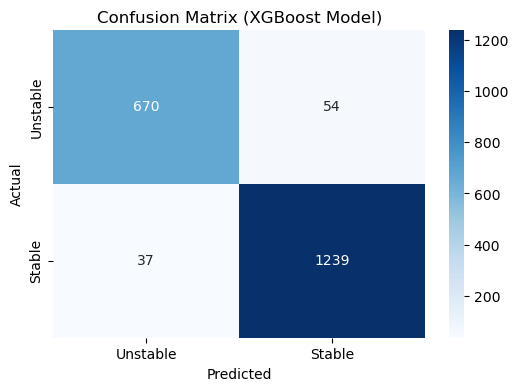

In [3]:
# SMOTE + XGBoost (Hyperparameter tuning) : 95.25%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load dataset
file_path = "C:/Users/user/Downloads/Data_for_UCI_named.csv"
df = pd.read_csv(file_path)

# Define features and target
features = ["tau1", "tau2", "tau3", "tau4", "p1", "p2", "p3", "p4", "g1", "g2", "g3", "g4"]
target = "stabf"

# Convert target variable to numerical labels
df[target] = df[target].astype('category').cat.codes

# Define X and y
X = df[features]
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter Optimization Function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

# Run Optuna Hyperparameter Tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Train Best XGBoost Model
best_xgb = XGBClassifier(**study.best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Predictions
y_pred = best_xgb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy after SMOTE: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unstable", "Stable"], yticklabels=["Unstable", "Stable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost Model)")
plt.show()


[I 2025-04-07 09:44:40,270] A new study created in memory with name: no-name-6dab287e-edf5-4b46-a6a5-e8437945ab24
[I 2025-04-07 09:44:42,387] Trial 0 finished with value: 0.9315 and parameters: {'n_estimators': 198, 'max_depth': 4, 'learning_rate': 0.027657513382483116, 'subsample': 0.9491594450823944, 'colsample_bytree': 0.5294720036194324, 'gamma': 2.7360320020524513, 'reg_alpha': 4.621785244497667, 'reg_lambda': 2.6114749250064113, 'min_child_weight': 6}. Best is trial 0 with value: 0.9315.
[I 2025-04-07 09:44:45,846] Trial 1 finished with value: 0.9395 and parameters: {'n_estimators': 139, 'max_depth': 10, 'learning_rate': 0.020448759749576752, 'subsample': 0.6017528910488397, 'colsample_bytree': 0.6001753570607915, 'gamma': 2.720085672608732, 'reg_alpha': 2.072314342320596, 'reg_lambda': 0.37329026554301425, 'min_child_weight': 8}. Best is trial 1 with value: 0.9395.
[I 2025-04-07 09:44:47,018] Trial 2 finished with value: 0.923 and parameters: {'n_estimators': 118, 'max_depth': 3

{'n_estimators': 180, 'max_depth': 7, 'learning_rate': 0.06666649881869062, 'subsample': 0.9247526740189176, 'colsample_bytree': 0.8290562975688274, 'gamma': 1.195756502023678, 'reg_alpha': 1.050997799081542, 'reg_lambda': 4.3669028529155804, 'min_child_weight': 4}
Accuracy after SMOTE: 0.9525
Precision: 0.9610
Recall: 0.9647
F1 Score: 0.9628

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       724
           1       0.96      0.96      0.96      1276

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



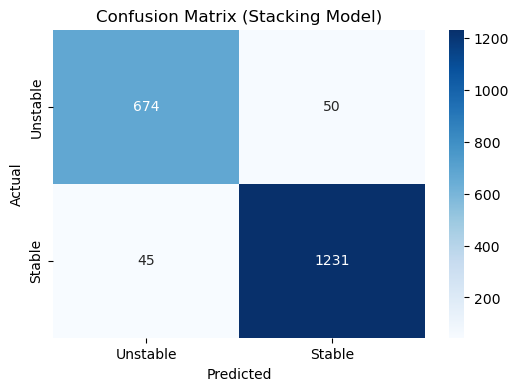

In [4]:
# SMOTE + XGBoost (Hyperparameter tuning) + CatBoost(n_estimator = 100, learning_rate = 0.05) - 95%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna  # Hyperparameter tuning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Load dataset
file_path = "C:/Users/user/Downloads/Data_for_UCI_named.csv"
df = pd.read_csv(file_path)
df = df.dropna()

# Define features and target
features = ["tau1", "tau2", "tau3", "tau4", "p1", "p2", "p3", "p4", "g1", "g2", "g3", "g4"]
target = "stabf"

# Convert target variable to numerical labels
df[target] = df[target].astype('category').cat.codes

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(df[features])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(features))

# Update features after transformation
X = X_poly_df
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE + Tomek Links for Resampling
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Define Hyperparameter Optimization Function for XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    return accuracy_score(y_test, model.predict(X_test))

# Run Optuna Hyperparameter Tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Adjust n_trials for more tuning

# Best parameters from tuning
best_params = study.best_params
print(best_params)

# Define Best XGBoost Model
best_xgb = XGBClassifier(**best_params, random_state=42)

# Define Stacking Classifier (Removed LightGBM)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('catboost', CatBoostClassifier(n_estimators=100, learning_rate=0.05, verbose=0, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train Stacking Model
stacking_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = stacking_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy after SMOTE: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unstable", "Stable"], yticklabels=["Unstable", "Stable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Stacking Model)")
plt.show()


[I 2025-04-07 09:47:07,439] A new study created in memory with name: no-name-a3c745f3-db99-4217-92ed-a2bbc70d8f3e
[I 2025-04-07 09:47:09,732] Trial 0 finished with value: 0.9585 and parameters: {'n_estimators': 181, 'max_depth': 4, 'learning_rate': 0.09670304504568483, 'subsample': 0.8855431392254363, 'colsample_bytree': 0.9068333434240319, 'gamma': 1.8922333250031382, 'reg_alpha': 0.4154671743492161, 'reg_lambda': 1.9476644364891311, 'min_child_weight': 5}. Best is trial 0 with value: 0.9585.
[I 2025-04-07 09:47:13,896] Trial 1 finished with value: 0.9515 and parameters: {'n_estimators': 148, 'max_depth': 9, 'learning_rate': 0.06909152901456707, 'subsample': 0.6352563246896413, 'colsample_bytree': 0.9907214011223372, 'gamma': 0.666281801010789, 'reg_alpha': 4.353662357967821, 'reg_lambda': 2.9172674077745815, 'min_child_weight': 5}. Best is trial 0 with value: 0.9585.
[I 2025-04-07 09:47:17,303] Trial 2 finished with value: 0.9465 and parameters: {'n_estimators': 150, 'max_depth': 10,

{'n_estimators': 181, 'max_depth': 4, 'learning_rate': 0.09670304504568483, 'subsample': 0.8855431392254363, 'colsample_bytree': 0.9068333434240319, 'gamma': 1.8922333250031382, 'reg_alpha': 0.4154671743492161, 'reg_lambda': 1.9476644364891311, 'min_child_weight': 5}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4953, number of negative: 4953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19890
[LightGBM] [Info] Number of data points in the train set: 9906, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3962, number of negative: 3962
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

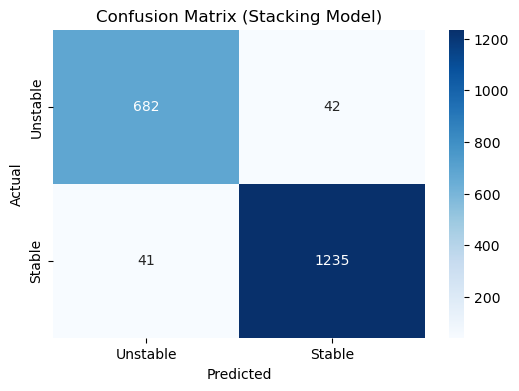

In [5]:
# SMOTE + XGBoost (Hyperparameter tuning) + LightGBM(n_estimator = 100, learning_rate = 0.05) - 94.95%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna  # Hyperparameter tuning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Load dataset
file_path = "C:/Users/user/Downloads/Data_for_UCI_named.csv"
df = pd.read_csv(file_path)
df = df.dropna()

# Define features and target
features = ["tau1", "tau2", "tau3", "tau4", "p1", "p2", "p3", "p4", "g1", "g2", "g3", "g4"]
target = "stabf"

# Convert target variable to numerical labels
df[target] = df[target].astype('category').cat.codes

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(df[features])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(features))

# Update features after transformation
X = X_poly_df
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE + Tomek Links for Resampling
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Define Hyperparameter Optimization Function for XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    return accuracy_score(y_test, model.predict(X_test))

# Run Optuna Hyperparameter Tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Adjust n_trials for more tuning

# Best parameters from tuning
best_params = study.best_params
print(best_params)

# Define Best XGBoost Model
best_xgb = XGBClassifier(**best_params, random_state=42)

# Define Stacking Classifier without CatBoost
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42))
    ],
    final_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train Stacking Model
stacking_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = stacking_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy after SMOTE: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unstable", "Stable"], yticklabels=["Unstable", "Stable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Stacking Model)")
plt.show()


[I 2025-04-07 09:54:11,723] A new study created in memory with name: no-name-14bb026f-0044-4c6e-8ed9-33c7d7327f52
[I 2025-04-07 09:54:13,882] Trial 0 finished with value: 0.9245 and parameters: {'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.025631729515531984, 'subsample': 0.5483868946588147, 'colsample_bytree': 0.8808401551298894, 'gamma': 1.964667624128279, 'reg_alpha': 4.977299072720467, 'reg_lambda': 0.4802408152820581, 'min_child_weight': 1}. Best is trial 0 with value: 0.9245.
[I 2025-04-07 09:54:17,802] Trial 1 finished with value: 0.955 and parameters: {'n_estimators': 193, 'max_depth': 5, 'learning_rate': 0.05549347494440603, 'subsample': 0.8335550736188335, 'colsample_bytree': 0.884872539918551, 'gamma': 0.8277080896865646, 'reg_alpha': 4.318177950868451, 'reg_lambda': 4.487732764423102, 'min_child_weight': 1}. Best is trial 1 with value: 0.955.
[I 2025-04-07 09:54:20,086] Trial 2 finished with value: 0.9515 and parameters: {'n_estimators': 188, 'max_depth': 4, 'lea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4953, number of negative: 4953
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19890
[LightGBM] [Info] Number of data points in the train set: 9906, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3962, number of negative: 3962
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19890
[LightGBM] [Info] Number of data points in the train set: 7924, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pa

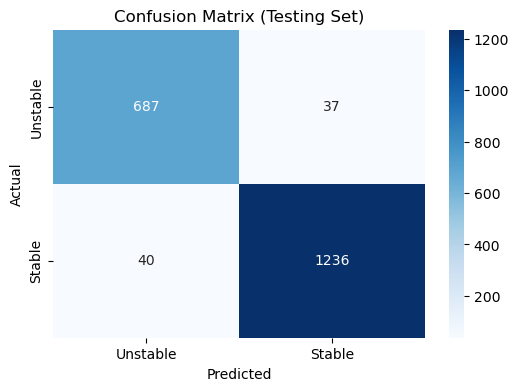

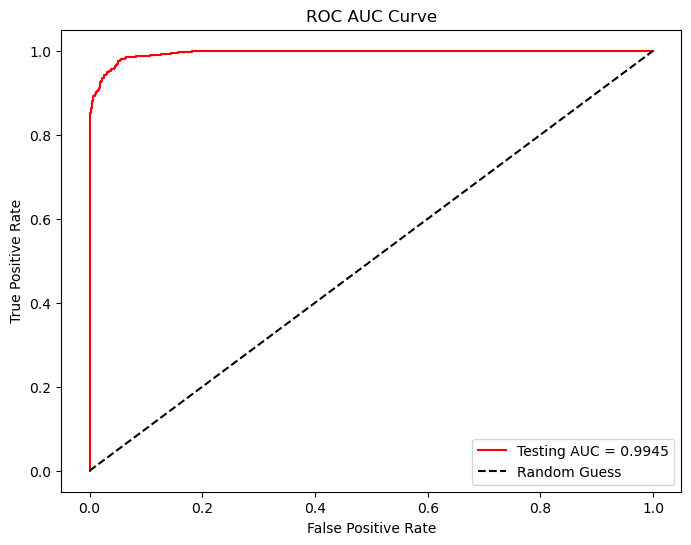

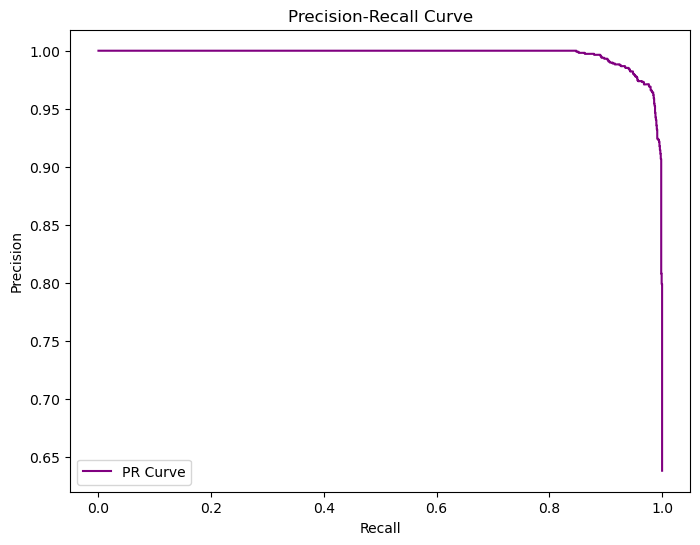

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve, precision_recall_curve,
    precision_score, recall_score, f1_score  # Added explicit metrics
)
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Load dataset
file_path = "C:/Users/user/Downloads/Data_for_UCI_named.csv"
df = pd.read_csv(file_path)
df = df.dropna()

# Define features and target
features = ["tau1", "tau2", "tau3", "tau4", "p1", "p2", "p3", "p4", "g1", "g2", "g3", "g4"]
target = "stabf"

# Convert target variable to numerical labels
df[target] = df[target].astype('category').cat.codes

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(df[features])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(features))

# Update features after transformation
X = X_poly_df
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE + Tomek Links for Resampling
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# ===================== HYPERPARAMETER TUNING =====================
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    return accuracy_score(y_test, model.predict(X_test))

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
best_params = study.best_params

# Define Best XGBoost Model
best_xgb = XGBClassifier(**best_params, random_state=42)

# ===================== STACKING CLASSIFIER =====================
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('catboost', CatBoostClassifier(n_estimators=100, learning_rate=0.1, verbose=0, random_state=42))
    ],
    final_estimator=LogisticRegression()
)

# Train Stacking Model
stacking_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred = stacking_model.predict(X_train_resampled)
y_test_pred = stacking_model.predict(X_test)

# ===================== MODEL EVALUATION =====================
# Calculate Metrics
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print Metrics
print("\n============ Training Set Metrics ============")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\n============ Testing Set Metrics ============")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Classification Reports
print("\nClassification Report (Training Set):")
print(classification_report(y_train_resampled, y_train_pred))

print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Unstable", "Stable"], 
            yticklabels=["Unstable", "Stable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Testing Set)")
plt.savefig("confusion_matrix.png")
plt.show()

# ===================== ROC AUC CURVE =====================
y_test_proba = stacking_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, label=f'Testing AUC = {test_roc_auc:.4f}', linestyle='-', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.legend()
plt.savefig("ROC_curve.png")
plt.show()

# ===================== PRECISION-RECALL CURVE =====================
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='PR Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.savefig("precision_recall_curve.png")
plt.show()

# ===================== LEARNING CURVE =====================
train_sizes, train_scores, test_scores = learning_curve(
    stacking_model, X_train_resampled, y_train_resampled, cv=5, 
    scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, 's-', label="Validation Score", color="red")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.savefig("learning_curve.png")
plt.show()

# ===================== RESIDUAL PLOT =====================
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='blue')
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.savefig("residual_plot.png")
plt.show()

# ===================== K-FOLD CROSS-VALIDATION =====================
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")